# C3M5 Lesson 5 Practice Lab: Flight Delays and Cancellations - Linear regression with time series

Your bosses are delighted with the job you've been doing so far using the delays and cancellations dataset. Your next step if developing a predictive analytics solution to forecast flight delays, transforming historical performance data into strategic insights that can help the agency recommend reliable airlines and optimize travel planning.

In this module's practice labs you will be working with a processed version of the [Domestic Airlines - On Time Performance](https://data.gov.au/data/dataset/domestic-airline-on-time-performance) from the Australian Government data. You will have access to the  following columns:

- `Arrivals_Delayed`: Total number of Arrivals_Delayed (aggregated data of all airlines and all routes)
- `Month`: Month of the flight in Month-Year format

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer.

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of contents
- [Step 1: Import libraries](#import-libraries)
- [Step 2: Load the data](#load-the-data)
- [Step 3: Training a linear regression model](#training-a-model)

<a id="import-libraries"></a>

## Step 1: Import libraries
Begin by importing pandas library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


<a id="load-the-data"></a>

## Step 2: Load and process the data
Run the cell below to load and process the data.

In [2]:
# load the data
df = pd.read_csv("delayed_arrivals.csv")

# convert the Month column to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y")

# set the Month column as the index
df.set_index("Month", inplace=True)

# visualize the first values
df.head()

,Arrivals_Delayed
Month,
2004-01-01,6996.0
2004-02-01,5166.0
2004-03-01,4768.0
2004-04-01,5429.0
2004-05-01,4540.0


Just to refresh you memory, plot the delays time-series.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Plot the time series
1. Set appropriate title and labels for the axes
</div>



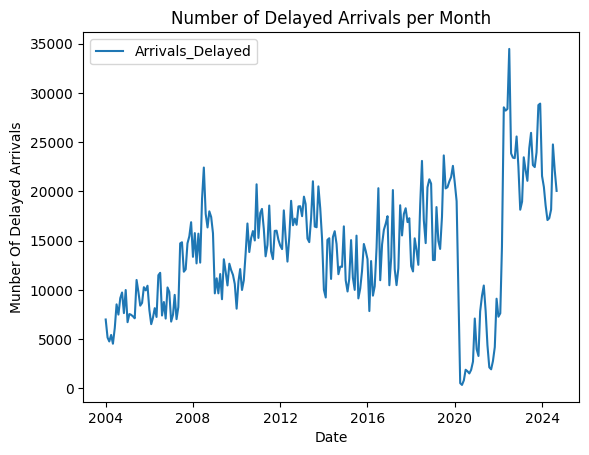

In [3]:
# plot the price
sns.lineplot(df)

# add ylabel
plt.ylabel("Munber Of Delayed Arrivals")
# add xlabel
plt.xlabel("Date")

# add title
plt.title("Number of Delayed Arrivals per Month")

plt.show()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

Your plot should look something like this (title and labels might be different).
<br>

<img src="imgsL3/tsplot.png" width="400">

</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# plot the price
sns.lineplot(df)

# add ylabel
plt.ylabel("Number of Delayed Arrivals")
# add xlabel
plt.xlabel("Date")

# add title
plt.title("Number of Delayed Arrivals per Month")

plt.show()
```
</details>

<a id="training-a-model"></a>

## Step 3: Training a Linear Regression Model

To help minimize travel disruptions, you decide to train a linear regression model to forecast flight arrival delays. Since delays can significantly impact connections and cause customer stress, predicting them accurately will allow you to proactively recommend more reliable flight options.

### Trend

You will begin by modeling the trend in your data. In this case, this involves training a simple linear regression where the input is the number of months.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Add a column `idx` to the time series DataFrame. Since the time series is already sorted, it should just be the values 0, 1, 2, .... You can do this with the `range()` function, passing the lenght of the DataFrame as an argument.
2. Add `idx` to the list of predictors.
3. Add the constant term to the model.
4. Select the target variable (`Arrivals_Delayed`).
5. Define and train the model using the `sm.OLS()` function and `fit()` method respectively.
6. Print the summary.
</div>

In [6]:
# add the idx column
df["idx"] = range(len(df))

# select the independent variable
predictors = ["idx"]

# add the constant term
X = sm.add_constant(df[predictors])

# select the dependent variable
Y = df["Arrivals_Delayed"]

# create and train the model
model = sm.OLS(Y,X)
results = model.fit()

# print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Arrivals_Delayed   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.57e-10
Time:                        16:29:28   Log-Likelihood:                -2499.1
No. Observations:                 249   AIC:                             5002.
Df Residuals:                     247   BIC:                             5009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9841.7016    701.505     14.029      0.0

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>
<span style="font-size: 11px;">

```mkdn
OLS Regression Results                            
==============================================================================
Dep. Variable:       Arrivals_Delayed   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     44.63
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.57e-10
Time:                        17:49:44   Log-Likelihood:                -2499.1
No. Observations:                 249   AIC:                             5002.
Df Residuals:                     247   BIC:                             5009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9841.7016    701.505     14.029      0.000    8460.007    1.12e+04
idx           32.6976      4.894      6.681      0.000      23.057      42.338
==============================================================================
Omnibus:                       22.463   Durbin-Watson:                   0.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.135
Skew:                          -0.636   Prob(JB):                     4.71e-07
Kurtosis:                       4.092   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.```
```
</span>
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# add the idx column
df["idx"] = range(len(df))

# select the independent variable
predictor = ["idx"]

# add the constant term
X = sm.add_constant(df[predictor])

# select the dependent variable
Y = df["Arrivals_Delayed"]

# create and fit the model
model = sm.OLS(Y,X)
results = model.fit()

# print the summary
print(results.summary())

```
</details>

What can you say about your model? 
- Are the parameters statistically significant? 
- What can you say about the R-squared? 

To improve the characterization of your model, you decide to visualize the model with a regression plot that shows the line generated by the coefficients, along with a scatter plot of the dependent and independent variables.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Use the `sns.regplot()` function to create the regression plot. In the x-axis you should have the `"idx"` column, and in the y-axis, the target variable, `Y`.
2. Add a grid for better visualization (already implemented).
</div>

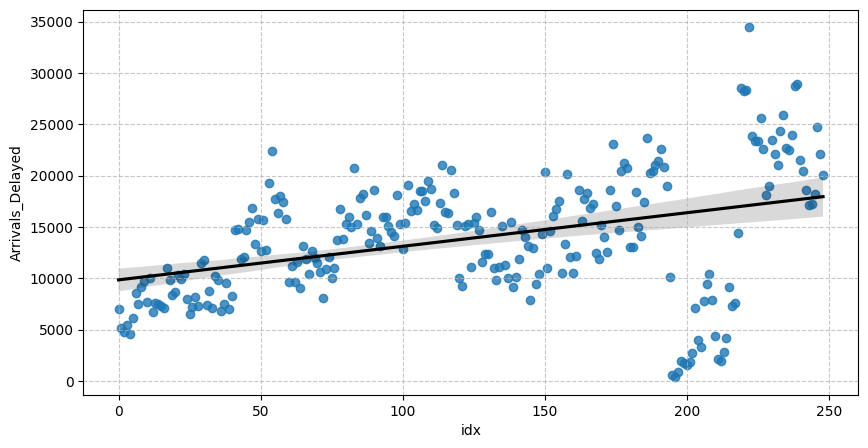

In [7]:
plt.figure(figsize=(10, 5))

# create the regression plot 
sns.regplot(x=df["idx"], y=df["Arrivals_Delayed"], line_kws={'color': 'black'})

# add grid
plt.grid(alpha=0.7, linestyle="--")

plt.show()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL3/regplot_simple.png" width="400">

</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
plt.figure(figsize=(10, 5))

# create the regression plot 
sns.regplot(x=df[predictor], y=Y, line_kws={'color': 'black'})

# add grid
plt.grid(alpha=0.7, linestyle="--")

plt.show()
```
</details>

As you can see, this is not a bad model, at least it captures the tendency of the data quite well, except, of course, during the pandemic.

### Seasonality
To improve your arrival delay predictions, you want to try enhancing the model by incorporating seasonal patterns. By extracting the quarter from your dates, you can capture important seasonal variations in flight reliability throughout the year, potentially leading to more accurate forecasts.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Add a column `"Season"` to the DataFrame. You can extract seasonal information by extracting the quarter from the DataFrame index using the `quarter` attribute (already implemented).
2. Select the columns `"idx"` and `"Season"` as the predictors.
3. Add the constant term to the model.
4. Define and train the model using the `sm.OLS()` function and `fit` method respectively.
5. Print the model summary.
</div>

In [8]:
# add the Season column
df["Season"] = df.index.quarter

# select the independent variable
predictors = ["idx", "Season"]

# add the constant term
X_seasonal = sm.add_constant(df[predictors])

# create and fit the model. Use the same target variable Y as before
model_seasonal = sm.OLS(Y,X_seasonal)
results_seasonal = model_seasonal.fit()

# print the summary
print(results_seasonal.summary())

                            OLS Regression Results                            
Dep. Variable:       Arrivals_Delayed   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     28.20
Date:                Sat, 24 May 2025   Prob (F-statistic):           9.41e-12
Time:                        16:35:59   Log-Likelihood:                -2494.1
No. Observations:                 249   AIC:                             4994.
Df Residuals:                     246   BIC:                             5005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7425.2198   1025.464      7.241      0.0

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>
<span style="font-size: 11px;">

```mkdn
OLS Regression Results                            
==============================================================================
Dep. Variable:       Arrivals_Delayed   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     28.20
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           9.41e-12
Time:                        18:27:50   Log-Likelihood:                -2494.1
No. Observations:                 249   AIC:                             4994.
Df Residuals:                     246   BIC:                             5005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7425.2198   1025.464      7.241      0.000    5405.411    9445.029
idx           32.4073      4.807      6.741      0.000      22.938      41.876
Season       988.1365    310.612      3.181      0.002     376.339    1599.934
==============================================================================
Omnibus:                       32.687   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.828
Skew:                          -0.774   Prob(JB):                     9.18e-12
Kurtosis:                       4.581   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```
</span>
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# add the Season column
df["Season"] = df.index.quarter

# select the independent variable
predictors = ["idx", "Season"]

# add the constant term
X_seasonal = sm.add_constant(df[predictors])

# create and fit the model. Use the same target variable Y as before
model_seasonal = sm.OLS(Y, X_seasonal)
results_seasonal = model_seasonal.fit()

# print the summary
print(results_seasonal.summary())
```
</details>

Analyze the training results. Did the model improve in terms of the R-squared? Is the new variable still statistically significant? 

To analyze how good your model is, you can no longer create the same plot as before, because that would be a 3D mess. What you can do instead, is plot the actual number of cancellations against the predicted values

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Find the predictions. You can do that with the `predict()` method
2. Use the `sns.regplot()` function to create the regression plot. In the x-axis you should have the predicted values column, and in the y-axis, the target variable, the actual values
3. Add the axes labels
4. Add a grid for better visualization
</div>

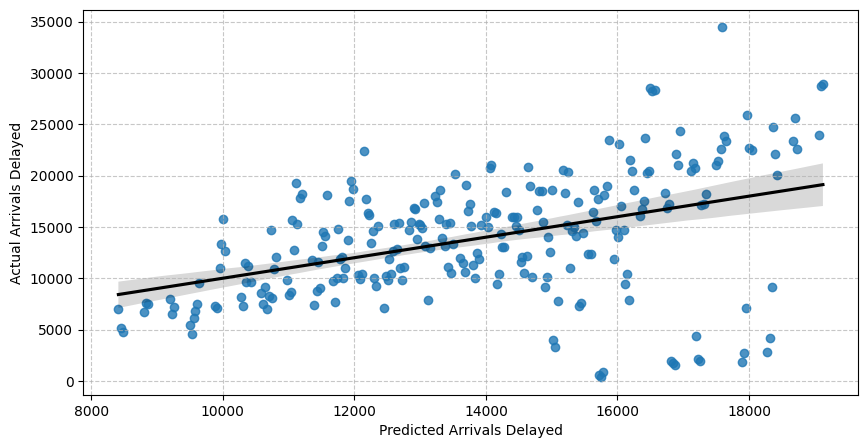

In [9]:
plt.figure(figsize=(10, 5))

# find the predicted values
y_pred = results_seasonal.predict(X_seasonal)

# Create the regression plot
sns.regplot(x=y_pred, y=Y, line_kws={'color': 'black'})

# add labels
plt.xlabel("Predicted Arrivals Delayed")
plt.ylabel("Actual Arrivals Delayed")

# add grid
plt.grid(alpha=0.7, linestyle="--")

plt.show()

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>

<img src="imgsL3/regplot_seasonal.png" width="400">

</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
plt.figure(figsize=(10, 5))

# find the predicted values
y_pred = results_seasonal.predict(X_seasonal)

# Create the regression plot
sns.regplot(x=y_pred, y=Y, line_kws={'color': 'black'})

# add labels
plt.xlabel("Predicted Arrivals Delayed")
plt.ylabel("Actual Arrivals Delayed")

# add grid
plt.grid(alpha=0.7, linestyle="--")

plt.show()
```
</details>

You can also find the Mean Absolute Deviation (MAD) for the predictions. This helps you quantify the errors.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Get the residuals from the modelby subtracting the predivted values from the real values.
2. Find the MAE, which is the mean of the absolute difference between each residual and the true value of the price.
</div>

In [10]:
# get the residuals
residuals = Y - y_pred

# get the mean absolute error
MAE = residuals.abs().mean()

# print the mean absolute error
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 3974.057910265702


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

```mkdn
Mean Absolute Error: 3974.057910265702
```
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# get the residuals
residuals = Y - y_pred

# get the mean absolute error
MAE = residuals.abs().mean()

# print the mean absolute error
print("Mean Absolute Error:", MAE)

```
</details>

Congratulations for making it until the end of this lab. Hope you enjoyed it! 